## LAB | Imbalanced data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [4]:
customer_churn=pd.read_csv('customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
columns = customer_churn.columns.values.tolist()
print(columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [7]:
dataset = customer_churn.drop(['customerID'], axis=1)

In [8]:
dataset =  dataset.drop(['Churn'], axis=1)

In [9]:
Churn = pd.get_dummies(customer_churn.Churn).iloc[:,1:]
#gender = pd.get_dummies(customer_churn.gender).iloc[:,1:]

In [10]:
Churn

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [6]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
customer_churn.drop('customerID',axis = 1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [19]:
dataset = pd.concat([dataset,Churn], axis=1)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Yes,Yes
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1,1


In [27]:
# X/y split
X = customer_churn[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = customer_churn['Churn']

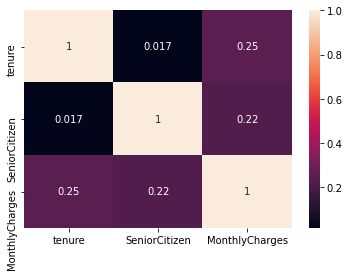

In [28]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [29]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [31]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [32]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [33]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

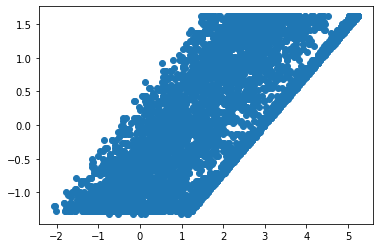

In [34]:
plt.scatter(logits,X_train_scaled['tenure'])

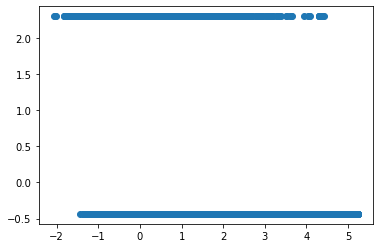

In [35]:
plt.scatter(logits,X_train_scaled['SeniorCitizen'])

<AxesSubplot:>

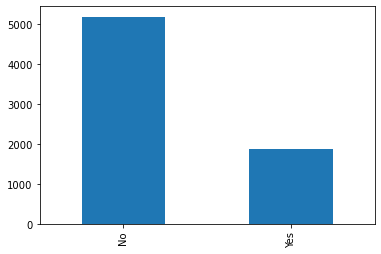

In [36]:
count_classes = customer_churn['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [37]:
import imblearn

### A relatively bad model

In [38]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [39]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [40]:
#we fail to identify 40%+ of  cases!
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]], dtype=int64)

### Oversampling / undersampling

In [41]:
from sklearn.utils import resample

In [42]:
# oversampling / undersampling is only to be done on the TRAINING set
# our test set still must reflect reality!
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,No
1,0.883210,2.296336,0.017840,No
2,-1.196572,-0.435476,-0.819594,Yes
3,1.168670,-0.435476,-1.483535,No
4,-0.829552,-0.435476,0.658427,Yes


### Oversampling

In [43]:
# separate majority/minority classes
no_Churn = train[train['Churn']=='No']
yes_Churn = train[train['Churn']=='Yes']

In [44]:
display(no_Churn.shape)
display(yes_Churn.shape)

(3876, 4)

(1406, 4)

In [45]:
# oversample minority
yes_Churn_oversampled = resample(yes_Churn, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_Churn),#<- make both sets the same size
                                    random_state=0)

In [46]:
# both sets are now of a reasonable size
display(no_Churn.shape)
display(yes_Churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [47]:
train_oversampled = pd.concat([no_Churn,yes_Churn_oversampled],axis=0)
train_oversampled.head(10)

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,No
1,0.883210,2.296336,0.017840,No
3,1.168670,-0.435476,-1.483535,No
5,1.046330,-0.435476,0.503285,No
6,-0.258631,-0.435476,0.701800,No
7,-1.237352,-0.435476,0.181323,No
8,-1.278132,-0.435476,-1.311711,No
9,-0.095511,-0.435476,-1.450171,No
10,1.576470,-0.435476,0.479930,No
11,-0.992672,-0.435476,0.329793,No


In [48]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [49]:
y_train_over

0        No
1        No
3        No
5        No
6        No
       ... 
405     Yes
3552    Yes
2524    Yes
1628    Yes
4123    Yes
Name: Churn, Length: 7752, dtype: object

In [50]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of Churn
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))


#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [51]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]], dtype=int64)

### Undersampling

In [52]:
# undersample majority
no_Churn_undersampled = resample(no_Churn, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(yes_Churn),
                                    random_state=0)

In [53]:
# both sets are the same size
# small, but balanced, and no repeated data
display(yes_Churn.shape)
display(no_Churn_undersampled.shape)

(1406, 4)

(1406, 4)

In [54]:
train_undersampled = pd.concat([yes_Churn,no_Churn_undersampled])
train_undersampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
2,-1.196572,-0.435476,-0.819594,Yes
4,-0.829552,-0.435476,0.658427,Yes
12,-1.115012,-0.435476,0.630068,Yes
13,-1.237352,-0.435476,0.199673,Yes
15,-1.155792,-0.435476,0.698464,Yes


In [55]:
y_train_under = train_undersampled['Churn'].copy()
X_train_under = train_undersampled.drop('Churn',axis = 1).copy()

In [56]:
# Still a slight improvement!
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_under, y_train_under)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))

precision:  0.47701149425287354
recall:  0.7170626349892009
f1:  0.5729076790336497


In [57]:
confusion_matrix(y_test,pred)

array([[934, 364],
       [131, 332]], dtype=int64)

### SMOTE

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [60]:
X_train_SMOTE.shape

(7752, 3)

In [61]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

#print("precision: ",precision_score(y_test,pred))
#print("recall: ",recall_score(y_test,pred))
#print("f1: ",f1_score(y_test,pred))

print("precision: ",precision_score(y_test,pred, pos_label="Yes"))
print("recall: ",recall_score(y_test,pred, pos_label="Yes"))
print("f1: ",f1_score(y_test,pred, pos_label="Yes"))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [62]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]], dtype=int64)